# Linear Regression - Housing Exercise

# Dataset Description

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 10

    :Predictive Attributes:
        - longitude             block group longitude
        - latitude              block group latitude
        - house_median_age      median house age in block group
        - total_rooms           total number of rooms within a block
        - total_bedrooms        total number of bedrooms within a block
        - population            block group population
        - households            total number of households within a block
        - median_income         median income for households within a block (tens of thousands of USD)
        - ocean_proximity       the house has a Ocean view or not

    :Target Variable:
        - median_house_value    median house value for households within a block (measured in USD)

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bureau publishes sample data (a block group typically has a population
of 600 to 3,000 people).

## Import Libraries

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

## Set-up Modules

In [2]:
%matplotlib inline

# Seaborn Visualization Style
sns.set_style('white')

## Ask an interesting Question

# Are houses that are in a block with less houses owned by people with a higher income?
### Following the logic that the less houses in a block, the bigger the houses in that block probably are, so they would be owned by people with a higher income. Through this analysis, we intend to prove this hypothesis.

## Get the data
- Exercise Tip: **pd.read_csv()**

In [3]:
# %load ../solutions/get_data.py
df = pd.read_csv('../datasets/Housing.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


## Explore the data
- Exercise Tip: **df.shape(), df.sample(), df.info(), df.describe(), df.corr()**

In [4]:
df.shape

(20640, 10)

In [5]:
df.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
6399,-118.04,34.13,35.0,249.0,31.0,268.0,29.0,15.0001,500001.0,INLAND
9474,-123.32,39.42,22.0,2085.0,432.0,1133.0,402.0,2.3906,92600.0,<1H OCEAN
8530,-118.35,33.90,31.0,1547.0,NaN,956.0,287.0,3.4698,225000.0,<1H OCEAN
15460,-117.29,33.15,11.0,2560.0,445.0,952.0,448.0,4.0625,87500.0,NEAR OCEAN
7073,-118.02,33.95,35.0,2085.0,400.0,1112.0,391.0,3.4886,173900.0,<1H OCEAN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Encoding Categorical Variables

In [8]:
#Looking at the unique values of the categorical variable
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder

df['Ocean_proximity_ENC'] = LabelEncoder().fit_transform(df['ocean_proximity'])

### Delete Nulls

In [10]:
siu=df.dropna()

In [11]:
siu.isna().sum()

longitude              0
latitude               0
housing_median_age     0
total_rooms            0
total_bedrooms         0
population             0
households             0
median_income          0
median_house_value     0
ocean_proximity        0
Ocean_proximity_ENC    0
dtype: int64

In [12]:
siu.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,Ocean_proximity_ENC
12061,-117.57,33.87,27.0,1786.0,287.0,939.0,278.0,5.1929,165000.0,INLAND,1
9976,-122.47,38.60,20.0,1036.0,202.0,589.0,194.0,5.3698,303300.0,INLAND,1
5563,-118.29,33.90,42.0,1273.0,309.0,1203.0,348.0,4.4636,162000.0,<1H OCEAN,0
15153,-117.04,33.01,28.0,922.0,107.0,314.0,97.0,8.4721,342300.0,<1H OCEAN,0
2470,-119.90,36.58,20.0,1935.0,363.0,1319.0,359.0,2.4814,74600.0,INLAND,1


## Explore the data (Visualization)
- Exercise Tip: **sns.boxplot(), sns.scatterplot(), sns.heatmap()**

<Axes: xlabel='median_house_value', ylabel='ocean_proximity'>

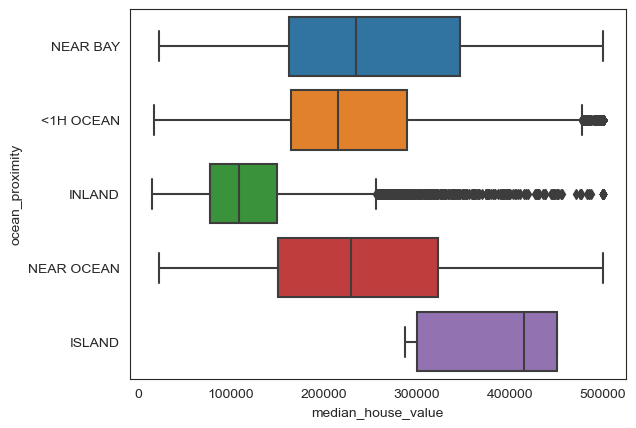

In [13]:
sns.boxplot(y='ocean_proximity', x='median_house_value', data=siu)

C:\Anaconda\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='median_house_value', ylabel='total_bedrooms'>

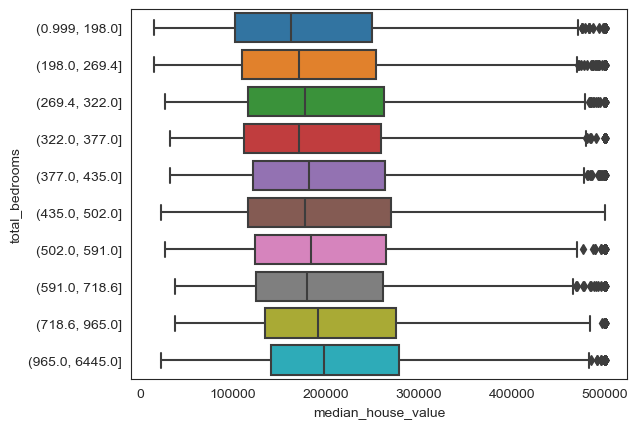

In [14]:
sns.boxplot(y=pd.qcut(siu['total_bedrooms'], q=10), x='median_house_value', data=siu)

<Axes: xlabel='median_income', ylabel='ocean_proximity'>

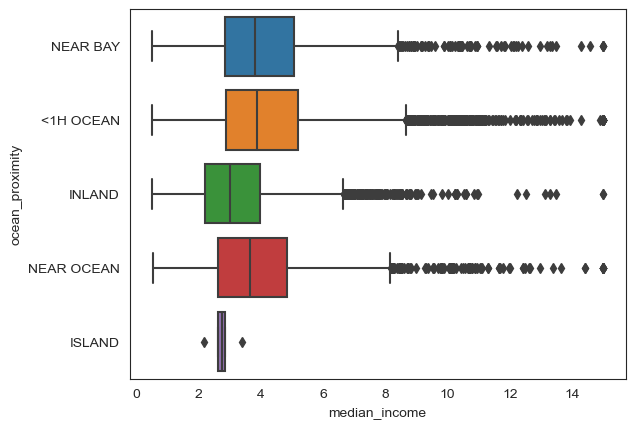

In [15]:
sns.boxplot(y='ocean_proximity', x='median_income', data=siu)

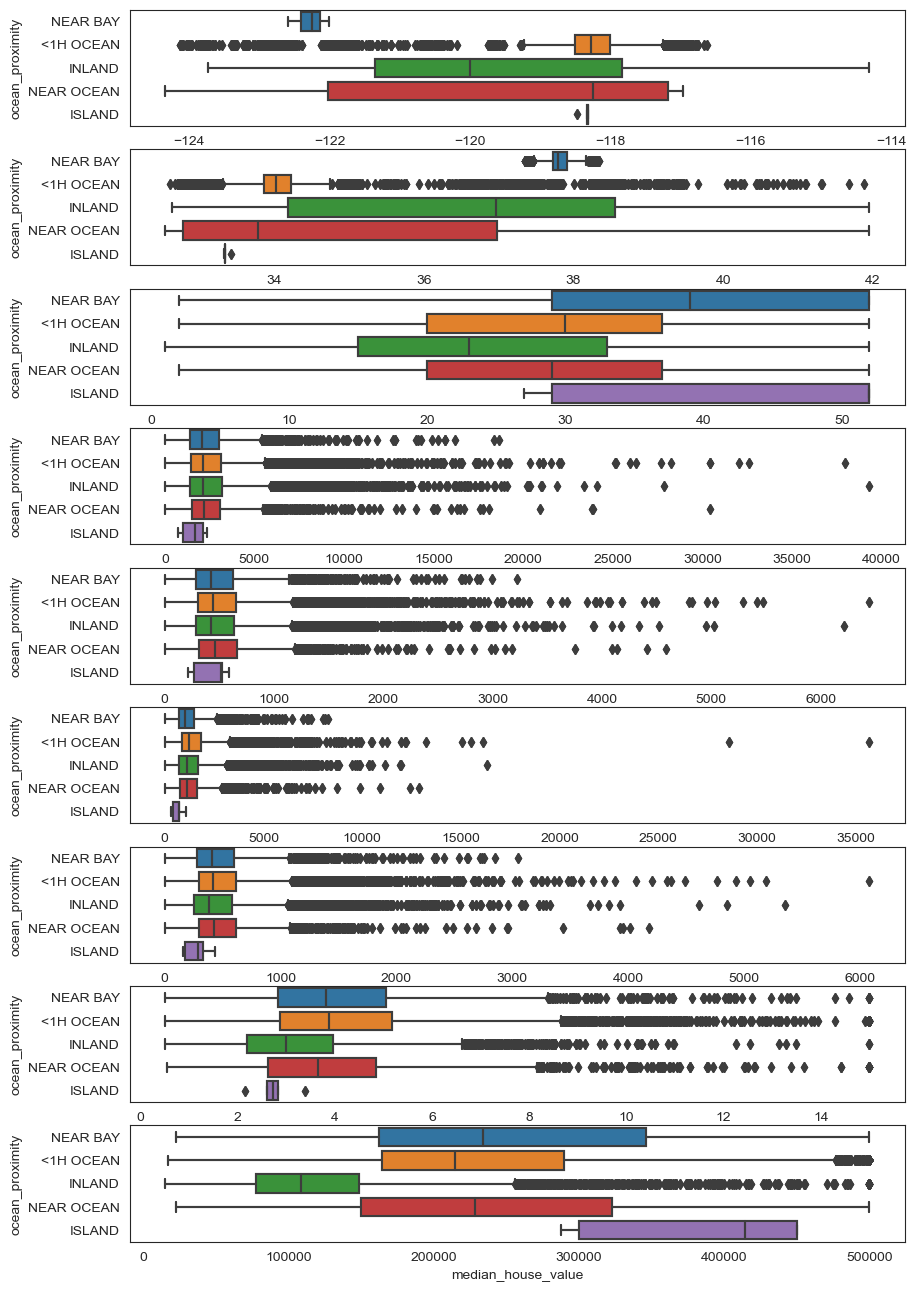

In [16]:
features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']

fig, ax = plt.subplots(9, 1, figsize=(10,16))
fig.subplots_adjust(wspace=0.5)

for i, ax in enumerate(ax.flat):
    sns.boxplot(data=siu, y='ocean_proximity', x=features[i], ax=ax)
    sns.boxplot(data=siu, y='ocean_proximity', x=features[i], ax=ax)

<Axes: xlabel='total_rooms', ylabel='total_bedrooms'>

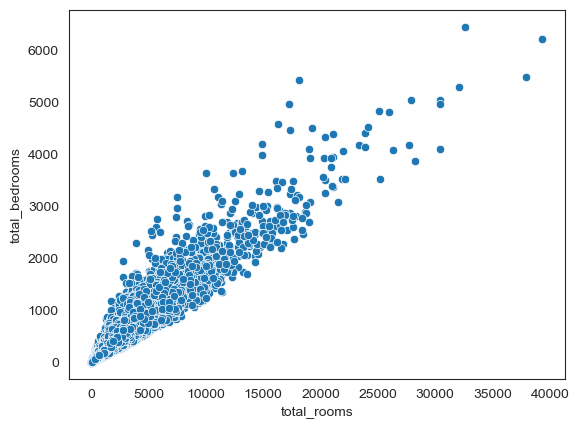

In [17]:
sns.scatterplot(x='total_rooms', y='total_bedrooms', data=siu)

<Axes: xlabel='median_house_value', ylabel='median_income'>

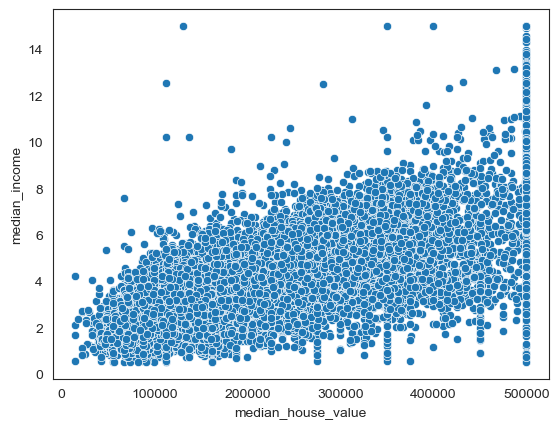

In [18]:
sns.scatterplot(x='median_house_value', y='median_income', data=siu)

<Axes: xlabel='households', ylabel='population'>

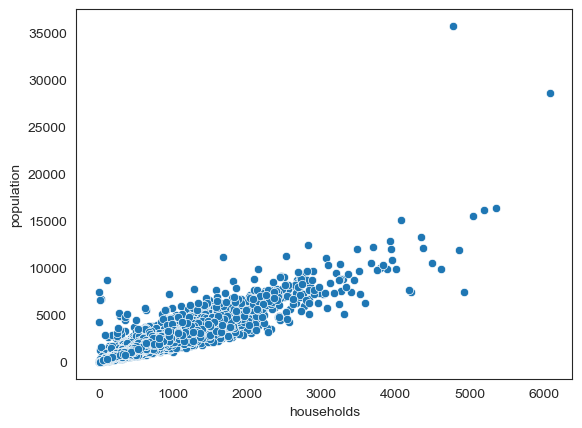

In [19]:
sns.scatterplot(x='households', y='population', data=siu)

<Axes: xlabel='ocean_proximity', ylabel='Ocean_proximity_ENC'>

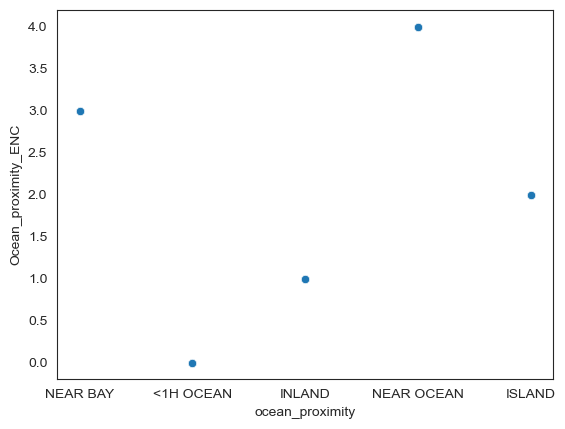

In [20]:
sns.scatterplot(x='ocean_proximity', y='Ocean_proximity_ENC', data=siu)

In [21]:
df1= siu[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value','Ocean_proximity_ENC']]
df1.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,Ocean_proximity_ENC
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


In [22]:
df1.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,Ocean_proximity_ENC
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155,1.166153
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099,1.420135
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000,1.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000,1.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,4.000000


<Axes: >

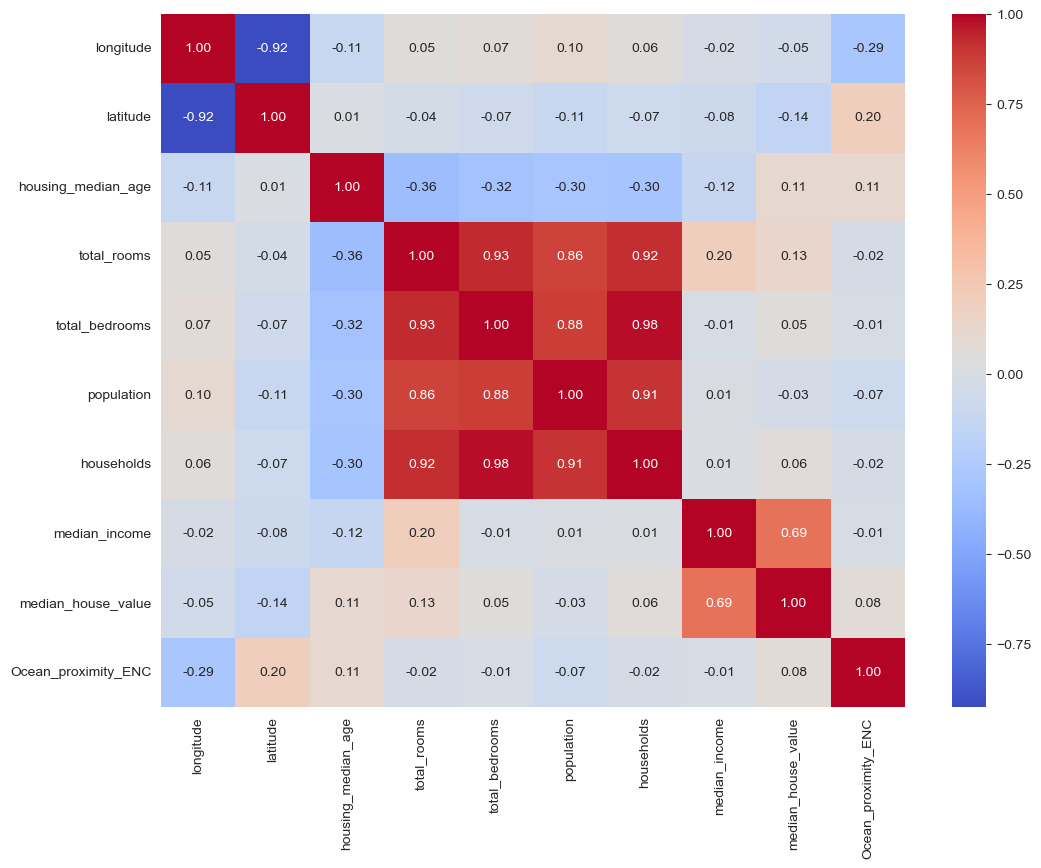

In [23]:
numeric_columns = df1.select_dtypes(include=[np.number])
matrisita = numeric_columns.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(matrisita, vmax=1, annot=True, fmt=".2f", cmap='coolwarm')

## Model the data

In [24]:
model = LinearRegression()

## Train/Test Split

In [25]:
X = df1['households'].values.reshape(-1, 1)  # Feature
y = df1['median_income'] # Target variable

In [26]:
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Scaling Data

In [27]:
from sklearn.preprocessing import MinMaxScaler

numeric_columns = df1.select_dtypes(include=[np.number])

#Scaling data to a range between 0 and 1
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(numeric_columns)
scaled_df = pd.DataFrame(scaled_data, columns=numeric_columns.columns)

In [28]:
scaled_df.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,Ocean_proximity_ENC
4273,0.599602,0.164718,0.686275,0.014217,0.027778,0.009445,0.020720,0.064661,0.309279,0.00
17839,0.236056,0.502657,0.470588,0.078158,0.087368,0.045685,0.089130,0.327782,0.524536,0.00
19171,0.132470,0.666312,0.862745,0.043619,0.060211,0.025589,0.060187,0.189142,0.255259,0.00
19267,0.338645,0.543039,0.705882,0.003408,0.002948,0.001934,0.003453,0.119171,0.432990,0.25
10351,0.667331,0.099894,0.176471,0.088560,0.090161,0.041089,0.091268,0.339230,0.798349,0.00


## Handling Outliers

<Axes: xlabel='households'>

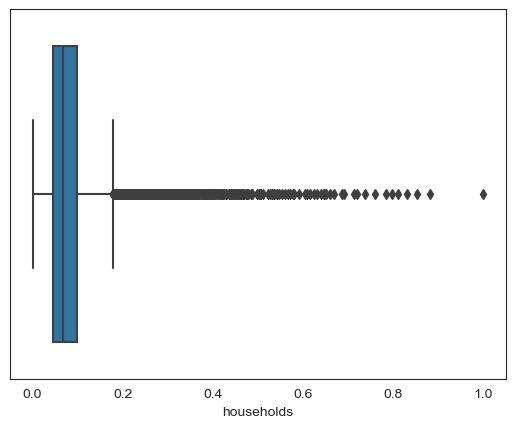

In [29]:
sns.boxplot(x=scaled_df['households'])

<Axes: xlabel='median_income'>

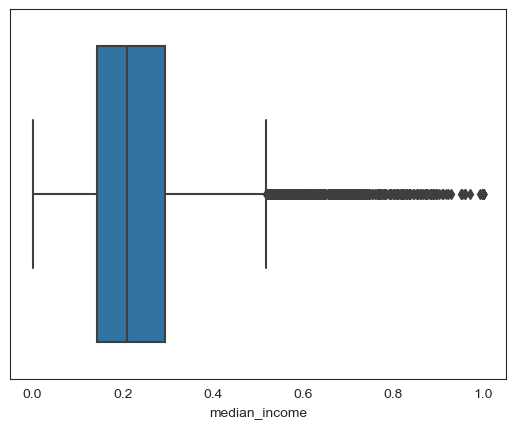

In [30]:
sns.boxplot(x=scaled_df['median_income'])

By looking at the outliers in of both variables affecting my linear regression model, I think it makes no sense to remove them as they provide valuable information for the hypothesis that I am trying to test. Therefore, I will keep them for this analysis.

## Train Model

In [31]:
# Train the linear regression model
model.fit(X_train, y_train)

LinearRegression()

## Test Model

In [32]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mse

3.630499294039686

On average, the squared difference between the actual target values and the predicted values is approximately 3.63. In this case, this is not bad at all as what we want to predict is the median income and the scale for this variable is a lot higher (done before scaling the variables).

In [33]:
print("The relationship between median income and the number of households within a block is:", model.coef_[0])

print("The intercept of our linear regression model is:", model.intercept_)

The relationship between median income and the number of households within a block is: 8.338512273542709e-05
The intercept of our linear regression model is: 3.829203281874542


On average, for every one-unit increase in median income, the number of households within a block increases by approximately 3.3 units, assuming all other factors remain constant.  Moreover, with an intercept of approximately 484.81, it suggests that when my predictor variable is zero, the predicted value of the target variable is approximately 484.81.

## Communicate and visualize the results

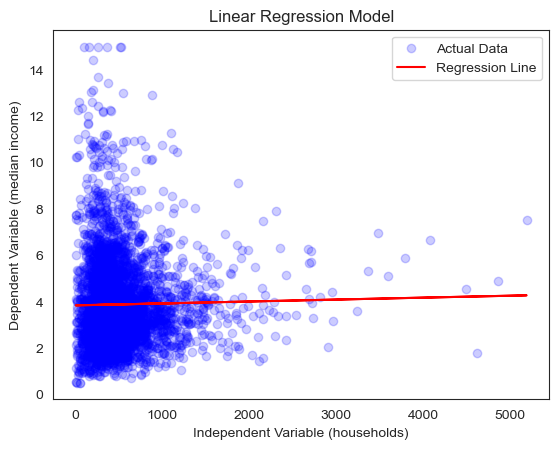

In [34]:
plt.scatter(X_test, y_test, color='blue', label='Actual Data', alpha=0.2)
plt.plot(X_test, y_pred, color='red', label='Regression Line')


plt.xlabel('Independent Variable (households)')
plt.ylabel('Dependent Variable (median income)')
plt.title('Linear Regression Model')
plt.legend()
plt.show()

Through the previous graph we can see the linear regression model that we have built in this analysis is not very accurate, as the correlation between these two is very low and therefore it is very hard to predict the median income based on the number of households in a block. Therefore, we can now answer to the question that we had asked ourselves: 
- Are houses that are in a block with less houses owned by people with a higher income?

The answer is no; there is no clear evidence to say that people with a higher income live in blocks that have less households.